# Travail personnel d'analyse numérique : le pendule double

Marine VILARIÑO FOSTIER

Rossen DIMITROV

### Introduction générale

Nous nous intéressons dans ce travail au problème du pendule double. La première étape sera d'implémenter les équations du mouvement. Celles-ci sont déterminées par le Lagrangien du pendule double:

$$L=\frac{1}{6}ml^{2}(\dot{\theta}_{2}^{2}+4\dot{\theta}_{2}^{2}+3\dot{\theta}_{1}\dot{\theta}_{2}\cos{(\theta_{1}-\theta_{2}})) + \frac{1}{2}mgl(3\cos{\theta_{1}} + \cos{\theta_{2}})$$

Pour obtenir les équations du mouvement, nous appliquons l'équation de Lagrange:

$$\frac{d}{dt} \left ( \frac{\partial L}{\partial \dot{q}_{j}} \right ) = \frac{\partial L}{\partial q_{j}}$$

En développant cette expression pour $\theta_{1}, \dot{\theta}_{1}$ et pour $\theta_{2}, \dot{\theta}_{2}$, nous obtenons deux équations:

$$8\ddot{\theta}_{1} + 3\ddot{\theta}_{2} \cos{(\theta_{1}-\theta_{2})} + 3\dot{\theta}_{2}^{2} \sin{(\theta_{1}-\theta_{2})} = -9 \frac{g}{l} \sin{\theta_{1}}$$

$$2\ddot{\theta}_{2} + 3\ddot{\theta}_{1} \cos{(\theta_{1}-\theta_{2})} - 3\dot{\theta}_{1}^{2} \sin{(\theta_{1}-\theta_{2})} = -3 \frac{g}{l} \sin{\theta_{2}}$$

Nous pouvons alors isoler les expressions de $\ddot{\theta}_{1}$ et $\ddot{\theta}_{2}$ pour obtenir les équations du mouvement que nous alons pouvoir utiliser:

$$\ddot{\theta}_{1} = \frac{-6 \dot{\theta}_{2}^{2} \sin{(\theta_{1}-\theta_{2})} - 9 \dot{\theta}_{1}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} + 9 \frac{g}{l} \sin{\theta_{2}} \cos{(\theta_{1}-\theta_{2})} - 18 \frac{g}{l} \sin{\theta_{1}}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}}$$

$$\ddot{\theta}_{2} = \frac{24 \dot{\theta}_{1}^{2} \sin{(\theta_{1}-\theta_{2})} + 9 \dot{\theta}_{2}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} - 24 \frac{g}{l} \sin{\theta_{2}} + 27 \frac{g}{l} \sin{\theta_{1}} \cos{(\theta_{1}-\theta_{2})}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}}$$

Ces équations ne peuvent pas être intégrées analytiquement. Cependant, nous pouvons le faire numériquement. Pour cela, nous allons utiliser la méthode Runge-Kutta d'ordre 4, afin d'obtenir les valeurs de $\theta_{1}, \theta_{2}$ en fonction du temps.

Pour cela, nous effectuons d'abord un changement de variables, afin de nous ramener à des équations différentielles du premier ordre. 

Posons $\begin{cases} \omega_{1} = \dot{\theta}_{1} \\ \omega_{2} = \dot{\theta}_{2} \end{cases}$

Nous obtenons ainsi un système d'équations du premier ordre:

$$\begin{cases} \dot{\theta}_{1} = \omega_{1} \\
\dot{\omega}_{1} = \frac{-6 \omega_{2}^{2} \sin{(\theta_{1}-\theta_{2})} - 9 \omega_{1}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} + 9 \frac{g}{l} \sin{\theta_{2}} \cos{(\theta_{1}-\theta_{2})} - 18 \frac{g}{l} \sin{\theta_{1}}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}} \\
\dot{\theta}_{2} = \omega_{2}\\
\dot{\omega}_{2} = \frac{24 \omega_{1}^{2} \sin{(\theta_{1}-\theta_{2})} + 9 \omega_{2}^{2} \sin{(\theta_{1}-\theta_{2})} \cos{(\theta_{1}-\theta_{2})} - 24 \frac{g}{l} \sin{\theta_{2}} + 27 \frac{g}{l} \sin{\theta_{1}} \cos{(\theta_{1}-\theta_{2})}}{16 - 9 \cos{(\theta_{1}-\theta_{2})}^{2}} \end{cases}$$

Appliquons la méthode Runge-Kutta d'ordre 4 à ce système.


### Methode Runge-Kutta d'ordre 4

La méthode permet de résoudre des problèmes aux conditions initiales de la forme $\dot{y} = f(t, y), y(t_{0}) = y_{0}$

En choisissant un intervale de temps $dt$, la solution de l'équation différentielle est donnée par un ensemble de valeurs $y_{n}$ défini par:

$$ \begin{cases} y_{n+1} = y_{n} + \frac{1}{6}(k_{0} + 2k_{1} + 2k_{2} + k_{3})
\\ t_{n+1} = t_{n} + dt \end{cases} $$

Où

$$ \begin{cases} k_{0} = dt.f(t_{n}, y_{n})
\\ k_{1} = dt.f(t_{n} + \frac{h}{2}, y_{n} + \frac{k0}{2})
\\ k_{2} = dt.f(t_{n} + \frac{h}{2}, y_{n} + \frac{k1}{2})
\\ k_{3} = dt.f(t_{n} + h, y_{n} + k_{2}) \end{cases}$$ 

Les équations du mouvement que nous utilisons n'ont pas de dépendance temporelle explicite. Elles sont exprimées sous la forme:

$$ \begin{cases} \dot{\omega}_{1} = f(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2})
\\ \dot{\omega}_{2} = g(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2})
\\ \dot{\theta}_{1} = h(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2})
\\ \dot{\theta}_{2} = i(\omega_{1}, \omega_{2}, \theta_{1}, \theta{2}) \end{cases}$$

Pour les résoudre, nous appliquons donc quatre fois la méthode. La solution pour $\omega_{1}$ est par exemple:

$$ \omega_{1, n+1} = \omega_{1, n} + \frac{1}{6} (k_{0} + 2k_{1} + 2k_{2} + k_{3}) $$

où

$$\begin{cases} k_{0} = dt.f(\omega_{1, n}, \omega_{2, n}, \theta_{1, n}, \theta_{2, n})
\\ k_{1} = dt.f(\omega_{1, n} + \frac{k_{0}}{2}, \omega_{2, n} + \frac{j_{0}}{2}, \theta_{1, n} + \frac{l_{0}}{2}, \theta_{2, n} + \frac{m_{0}}{2})
\\ k_{2} = dt.f(\omega_{1, n} + \frac{k_{1}}{2}, \omega_{2, n} + \frac{j_{1}}{2}, \theta_{1, n} + \frac{l_{1}}{2}, \theta_{2, n} + \frac{m_{1}}{2})
\\ k_{3} = dt.f(\omega_{1, n}+k_{2}, \omega_{2, n}+j_{2}, \theta_{1, n}+l_{2}, \theta_{2, n}+m_{2}) \end{cases}$$ 

et où les $j_{i}, l_{i}, m_{i}$ sont définis de façon similaire par rapport à $g, h, i$ respectivement.

In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the parameters
m = 1.0
L = 1.0
g = 9.81
dt = 0.001
tmax = 20.0
# Set initial condition
th1_init = numpy.pi/2
th2_init = numpy.pi/2
thdot1_init = 0.0
thdot2_init = 0.0

In [3]:
def omegadot1(omega1, omega2, th1, th2, g = 9.81, L = 1.0, m = 1.0):
    """
    Returns the value of the second derivative for theta1 at given time
    
    Parameters
    ------
    omega1 : float
            value of the derivative for first angle at given time
    omega2 : float
            value of the derivative for second angle at given time
    th1 : float
            value of first angle at given time
    th2 : float
            value of second angle at given time
    g : float, optionnal
            gravitational acceleration
            default value : 9.81
    L : float, optionnal
            lenght of each rod
            default value : 1.0
    m : float, optionnal
            mass of each rod
            default value : 1.0
    
    Returns
    -------
    thdotdot1 : float
        value of the second derivative for first angle at given time

    
    """
    thdotdot1 = ((-9 * omega1**2 * math.sin(th1-th2) * math.cos(th1-th2) -
                  6 * omega2**2 * math.sin(th1-th2) +
                  9 * g/L * math.sin(th2) * math.cos(th1-th2) -
                  18*(g/L) * math.sin(th1)) / 
                 (16 - 9 * (math.cos(th1-th2))**2))
    
    return thdotdot1

def omegadot2(omega1, omega2, th1, th2, g = 9.81, L = 1.0, m = 1.0):
    
    """
    Returns the value of the second derivative for theta2 at given time
    
    Parameters
    ------
    omega1 : float
            value of the derivative for first angle at given time
    omega2 : float
            value of the derivative for second angle at given time
    th1 : float
            value of first angle at given time
    th2 : float
            value of second angle at given time
    g : float, optionnal
            gravitational acceleration
            default value : 9.81
    L : float, optionnal
            lenght of each rod
            default value : 1.0
    m : float, optionnal
            mass of each rod
            default value : 1.0
    
    Returns
    -------
    thdotdot2 : float
        value of the second derivative for second angle at given time
    """
        
    thdotdot2 = ((24 * omega1**2 * math.sin(th1-th2) +
                  9* omega2**2 * math.sin(th1-th2) * math.cos(th1-th2) -
                  24*g/L* math.sin(th2) + 
                  27*g/L * math.sin(th1) * math.cos(th1-th2)) /
                 (16 - 9 * (math.cos(th1-th2))**2))
        
    return thdotdot2

In [15]:
def thetadot1(omega1, omega2, th1, th2):
    thetadot1 = omega1
    return thetadot1

def thetadot2(omega1, omega2, th1, th2):
    thetadot2 = omega2
    return thetadot2

In [16]:
def rk4_step(udot, vdot, u, v, dt, f, g, h, i, *args):
    """
    Returns the solution at the next time step using RK4 method
    
    Parameters:
    ------
    udot : float
        Solution for the first derivative of first variable at previous time step
    vdot : float
        Solution for the first derivative of second variable at previous time step
    u : float
        value of first variable at previous time step
    v : float
        value of second variable at previous time step
    dt : float
        time-step size
    f : function
        function to compute the derivatives of first variable
    g : function
        function to compute the derivatives of second variable
    args : tuple, optionnal
        positional arguments to pass to the functions f and g
        
    Returns:
    ------
    step : numpy.ndarray
        the solution at next time-step
        as a 1D array of floats
    """
    k0 = f(udot, vdot, u, v, *args) * dt
    j0 = g(udot, vdot, u, v, *args) * dt
    l0 = h(udot, vdot, u, v, *args) * dt
    m0 = i(udot, vdot, u, v, *args) * dt
    k1 = f(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt 
    j1 = g(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt
    l1 = h(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt 
    m1 = i(udot + k0/2, vdot + j0/2, u + l0/2, v + m0/2, *args) * dt 
    k2 = f(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    j2 = g(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    l2 = h(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    m2 = i(udot + k1/2, vdot + j1/2, u + l1/2, v + m1/2, *args) * dt
    k3 = f(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    j3 = g(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    l3 = h(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    m3 = i(udot + k2, vdot + j2, u + l2, v + m2, *args) * dt
    
    udot_new = udot + (k0 + 2*k1 + 2*k2 + k3)/6
    vdot_new = vdot + (j0 + 2*j1 + 2*j2 + j3)/6
    u_new = u + (l0 + 2*l1 + 2*l2 + l3)/6
    v_new = v + (m0 + 2*m1 + 2*m2 + m3)/6
    
    step = numpy.array([udot_new, vdot_new, u_new, v_new])
    
    return step

In [18]:
N = int(tmax/dt) + 1 # number of time steps
# Set initial conditions
res = numpy.empty((N, 4))
res[0] = numpy.array([thdot1_init, thdot2_init, th1_init, th2_init])
t = 0.0
# Time integration using RK4 method
for n in range(N-1):
    res[n+1] = rk4_step(res[n][0], res[n][1], res[n][2], res[n][3], dt, omegadot1, omegadot2, thetadot1, thetadot2)
    t = t + dt

In [19]:
th1 = res[:, 2]%(2*numpy.pi) # array of values for theta1
th2 = res[:, 3]%(2*numpy.pi) # array of values for theta2
# Coordinates of the end of first and second rod
# at time t = tmax
x1 = L * math.sin(th1[-1])
y1 = - L * math.cos(th1[-1])
x2 = L * math.sin(th1[-1]) + L * math.sin(th2[-1])
y2 = - L * math.cos(th1[-1]) - L * math.cos(th2[-1])

print("Valeurs à t = {:.0f} secondes:".format(t))
print("Coordonées de l'extrémité de la première barre: ({:.3f}".format(x1),",{:.3f})".format(y1))
print("Coordonées de l'extrémité de la seconde barre: ({:.3f}".format(x2),",{:.3f})".format(y2))

Valeurs à t = 20 secondes:
Coordonées de l'extrémité de la première barre: (0.664 ,-0.748)
Coordonées de l'extrémité de la seconde barre: (0.037 ,0.031)


In [20]:
def l1_diff(u_coarse, u_fine, dt):
    """
    Returns the difference in the L1-norm between the solution on
    a coarse grid and the solution on a fine grid.
    
    Parameters
    ----------
    u_coarse : numpy.ndarray
        Solution on the coarse grid as a 1D array of floats.
    u_fine : numpy.ndarray
        Solution on the fine grid as a 1D array of floats.
    dt : float
        Time-step size.
    
    Returns
    -------
    diff : float
        The difference between the two solution in the L1-norm
        scaled by the time-step size.
    """
    N_coarse = len(u_coarse)
    N_fine = len(u_fine)
    ratio = math.ceil(N_fine / N_coarse)
    diff = dt * numpy.sum(numpy.abs(u_coarse - u_fine[::ratio]))
    return diff

In [21]:
r = 2  # time-step size refinement ratio
dt_min = 0.0001  # finest time-step size

dt_values = [dt_min, r * dt_min, r**2 * dt_min]
res_values = []

for i in range(len(dt_values)):
    N = int(tmax / (dt_values[i])) + 1  # number of time steps
    # Set initial conditions.
    res = numpy.empty((N,4))
    res[0] = numpy.array([thdot1_init, thdot2_init, th1_init, th2_init])
    # Time integration using RK4 method.
    for n in range(N - 1):
        res[n + 1, :] = rk4_step(res[n, 0], res[n, 1], res[n, 2], res[n, 3], dt_values[i], 
                                 omegadot1, omegadot2, thetadot1, thetadot2)
    res_values.append(res)


In [22]:
diff_values = []
for i, dt in enumerate(dt_values[:-1]):
    diff = l1_diff(res_values[-1][:, 2], res_values[i][:, 2], dt)
    diff_values.append(diff)

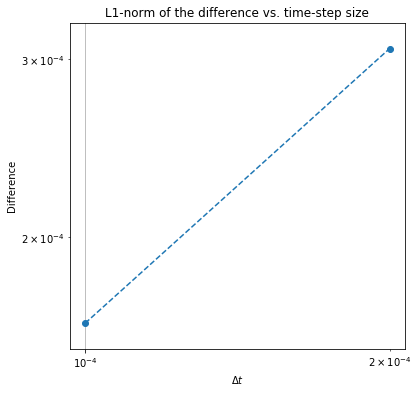

In [25]:
# Plot difference versus the time-step size.
pyplot.figure(figsize=(6.0, 6.0))
pyplot.title('L1-norm of the difference vs. time-step size')
pyplot.xlabel('$\Delta t$')
pyplot.ylabel('Difference')
pyplot.grid()
pyplot.loglog(dt_values[:-1], diff_values, color='C0', linestyle='--', marker='o')
pyplot.axis('equal');

In [24]:
# Compute the observed order of convergence.
p = numpy.abs((math.log(l1_diff(res_values[2][:, 3], res_values[1][:, 3], dt_values[2]) /
              l1_diff(res_values[1][:, 3], res_values[0][:, 3], dt_values[1])) /
     math.log(r)))

print('Observed order of convergence: p = {:.3f}'.format(p))

Observed order of convergence: p = 3.832
